# Anime Recommendation System

### Anime is a popular form of entertainment enjoyed by millions of people worldwide. With so many anime titles available, it can be overwhelming for fans to decide which ones to watch next. This is where a recommendation system can be helpful.

### By the end of this project, we aim to build a recommendation system that suggests anime titles based on a user's preferences. This system can help fans discover new anime titles and enhance their viewing experience.

# 

# Recommendation System using Python

### Our project aims to build an Anime Recommendation System that provides personalized anime recommendations for users. This will help anime fans to discover new titles and enhance their viewing experience.

### We will be using two CSV files in our project: Anime.csv and Rating.csv. These files contain information about anime titles and their ratings respectively. Our first step in building the recommendation system will be to explore and analyze the data in these files, and preprocess them as needed.

### We will use the Python programming language and various libraries such as Pandas and NumPy to implement the recommendation system. We will also use Jupyter Notebook as our development environment, which provides an interactive interface for data exploration and analysis.

### With these tools and our data, we can build a recommendation system that suggests anime titles based on a user's preferences.

# 

## EDA and data cleaning

### To ensure our Anime Recommendation System's credibility and precision, conducting both data cleaning and exploratory data analysis is pivotal.

### I’ll start by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the anime.csv file into a Pandas DataFrame
anime = pd.read_csv('anime.csv')

# Read the rating.csv file into a Pandas DataFrame
rating = pd.read_csv('rating.csv')

In [3]:
# Display the first 5 rows of the 'anime' DataFrame
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
# Display the first 5 rows of the 'rating' DataFrame
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
# Return the shape of the 'anime' DataFrame (number of rows and columns)
anime.shape

(12294, 7)

In [6]:
# Return the shape of the 'rating' DataFrame (number of rows and columns)
rating.shape

(7813737, 3)

In [7]:
# Return a statistical summary of the 'anime' DataFrame's numerical columns
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [8]:
# Return a statistical summary of the 'rating' DataFrame's numerical columns
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [9]:
# Return the count of each unique value in the 'rating' DataFrame's 'rating' column.
rating.rating.value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [10]:
# Drops all rows in the 'rating' DataFrame where the value equal -1
rating = rating[rating["rating"] != -1]

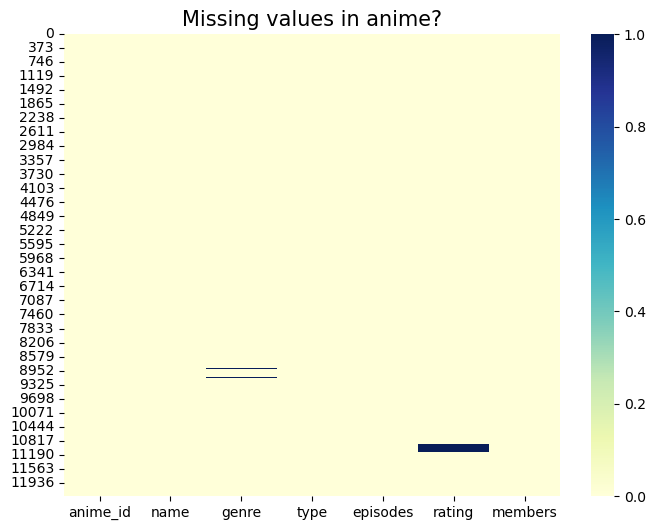

In [11]:
# Set the size of the figure to 8x6 inches
plt.figure(figsize=(8,6))

# Generate a heatmap showing the missing values in the 'anime' DataFrame using the 'sns.heatmap()' function
# The 'cmap' parameter sets the color map to 'YlGnBu'
sns.heatmap(anime.isnull(), cmap='YlGnBu')

# Set the title of the plot to 'Missing values in anime?' with a fontsize of 15
plt.title("Missing values in anime?", fontsize=15)

# Display the plot
plt.show()

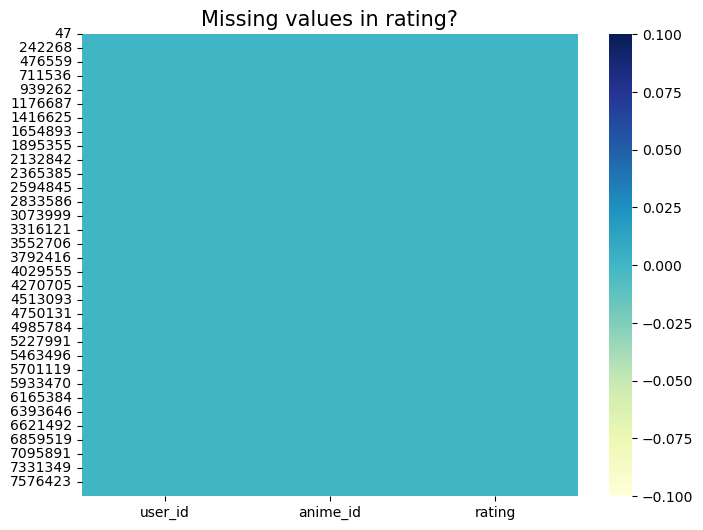

In [12]:
# Set the figure size to 8x6 inches
plt.figure(figsize=(8,6))

# Create a heatmap plot using the 'sns.heatmap()' function to visualize the distribution of missing values in the 'rating' DataFrame
# The 'cmap' parameter sets the color map to 'YlGnBu'
sns.heatmap(rating.isnull(), cmap='YlGnBu')

# Set the title of the plot to 'Missing values in rating?' with a fontsize of 15
plt.title("Missing values in rating?", fontsize = 15)

# Display the plot
plt.show()

# 

## Prepare the data

### To create an effective Anime Recommendation System, we need to prepare the data by processing and formatting it correctly.

In [13]:
# Combine the 'rating' and 'anime' DataFrames using the 'merge()' function from Pandas
# The 'anime_id' column is used as the key to merge the DataFrames
df = pd.merge(rating,anime[["anime_id","name"]], left_on = "anime_id", right_on = "anime_id")

# Display the first few rows of the merged DataFrame using the 'head()' function
df.head()

,user_id,anime_id,rating,name
0,1,8074,10,Highschool of the Dead
1,3,8074,6,Highschool of the Dead
2,5,8074,2,Highschool of the Dead
3,12,8074,6,Highschool of the Dead
4,14,8074,6,Highschool of the Dead


In [14]:
# Return the shape of the 'df' DataFrame (number of rows and columns)
df.shape

(6337239, 4)

In [15]:
# Group the 'df' DataFrame by the 'name' column, and count the number of ratings for each anime
rat_count = df.groupby("name")["rating"].count()

# Sort the values in 'rat_count' in descending order
rat_count = rat_count.sort_values(ascending = False)

# Display 'rat_count'
rat_count

name
Death Note                         34226
Sword Art Online                   26310
Shingeki no Kyojin                 25290
Code Geass: Hangyaku no Lelouch    24126
Angel Beats!                       23565
                                   ...  
La Primavera                           1
Chou Zenmairobo: Patrasche             1
Ushi Atama                             1
Gun-dou Musashi Recap                  1
Futago no Ookami Daibouken             1
Name: rating, Length: 9926, dtype: int64

In [16]:
# Set the limit of the minimum number of ratings to 5000
limit = 5000

# Find the names of anime with ratings greater than or equal to the 'limit'
over_limit = rat_count[rat_count.apply(lambda x: x >= limit)].index

# Selecting the rows in 'df' where the 'name' column is in the 'over_limit' index
final_df = df[df['name'].apply(lambda x: x in over_limit)]

In [17]:
# Return the shape of the 'final_df' DataFrame (number of rows and columns)
final_df.shape

(2517097, 4)

# 

## Recommendation System

### A recommendation system is an algorithmic approach to suggest items of interest to users based on their past interactions with a system.

In [18]:
# Create a pivot table 'recom' from the 'final_df' DataFrame
recom = final_df.pivot_table(index='user_id',columns='name',values='rating')

# Display the first 5 rows and columns of the 'recom' pivot table
recom.iloc[:5,:5]

name,Accel World,Afro Samurai,Air,Air Gear,Akame ga Kill!
user_id,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,7.0,6.0,NaN,NaN,8.0
5,3.0,NaN,NaN,NaN,4.0
7,8.0,NaN,NaN,NaN,NaN


In [19]:
# Returns the count of the number of occurrences of each unique value
final_df.name.value_counts()

Death Note                                      34226
Sword Art Online                                26310
Shingeki no Kyojin                              25290
Code Geass: Hangyaku no Lelouch                 24126
Angel Beats!                                    23565
                                                ...  
Sayonara Zetsubou Sensei                         5108
Natsume Yuujinchou                               5080
Ookami-san to Shichinin no Nakama-tachi          5063
Pokemon: Mewtwo no Gyakushuu                     5038
Darker than Black: Kuro no Keiyakusha Gaiden     5023
Name: name, Length: 279, dtype: int64

In [20]:
# Define a function 'corr' that takes in two arguments
def corr(df, name):
    
    # Compute the correlation between the 'name' column and every other column in the DataFrame
    similar = df.corrwith(df[name])
    
    # Convert the resulting Series into a DataFrame named 'similar'
    similar = pd.DataFrame(similar,columns=['Correlation'])
    
    # Sort the values in the 'similar' DataFrame in descending order of correlation
    similar = similar.sort_values(by = 'Correlation', ascending = False)
    
    # Return the 'similar' DataFrame
    return similar


# 

## Recommendations

### Recommendations are personalized suggestions provided to users based on their interests, preferences, and behavior.

In [21]:
anime = 'Bleach'

# Returns a DataFrame that shows the top 10 animes with the highest correlation to 'anime'
corr(recom, anime).head(10)

,Correlation
name,
Bleach,1.000000
Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu,0.594286
Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru,0.566628
Naruto,0.547983
Fairy Tail,0.541162
Naruto: Shippuuden Movie 1,0.508501
Bleach Movie 1: Memories of Nobody,0.504684
Dragon Ball GT,0.482405
Katekyo Hitman Reborn!,0.480154


In [22]:
anime1 = 'Dragon Ball GT'

# Returns a DataFrame that shows the top 10 animes with the highest correlation to 'anime1'
corr(recom, anime1).head(10)

,Correlation
name,
Dragon Ball GT,1.000000
Dragon Ball Z,0.519401
Bleach,0.482405
Dragon Ball,0.481594
InuYasha,0.469370
Fairy Tail,0.466178
Naruto: Shippuuden Movie 1,0.464253
Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru,0.455629
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!,0.451550


In [23]:
anime2 = 'Naruto'

# Returns a DataFrame that shows the top 10 animes with the highest correlation to 'anime2'
corr(recom, anime2).head(10)

,Correlation
name,
Naruto,1.000000
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!,0.582344
Naruto: Shippuuden Movie 1,0.578797
Bleach,0.547983
Fairy Tail,0.444271
Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru,0.439225
Dragon Ball Z,0.437442
InuYasha,0.433100
Dragon Ball GT,0.429704


# 

## Summary

### Overall, recommendation systems are widely used in various industries, including e-commerce, entertainment, and social media, to personalize content and improve user engagement.